In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow as tf
from tensorboard.plugins import projector
#from tensorflow.examples.tutorials.mnist import input_data
import os
#print(os.listdir("../input"))



import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
test_data = np.array(pd.read_csv(r'/Users/amaterasu/Documents/ai/mnist_test.csv'), dtype='float32')

for i in range(2):
    print(test_data[i, 0:])

embed_count = 2500

image_test = test_data[:embed_count, 1:] / 255
label_test = test_data[:embed_count, 0]

for i in range(2):
    print(image_test[i, 0:])

for i in range(2):
    print(label_test[i])

[  2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 116. 125. 171.
 255. 255. 150.  93.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 169. 253. 253. 253.
 253. 253. 253. 218.  30.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 169. 253. 253. 253. 213.
 142. 176. 253. 253. 122.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  52. 250. 253. 210.  32.  12.
   0.   6. 206. 253. 140.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

2500


2023-06-16 05:47:29.781248: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled


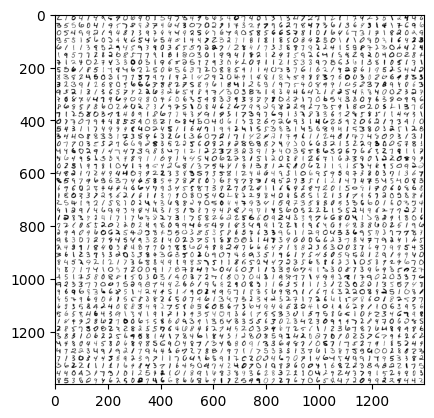

In [3]:
summary_writer = tf.summary.FileWriter(r'/Users/amaterasu/Documents/ai/logs_Mnist')
embedding_var = tf.Variable(image_test, name='fmnist_embedding')

PATH = '/Users/amaterasu/Documents/ai'

logdir = PATH + '/logs_Mnist'


config = projector.ProjectorConfig() 
embedding = config.embeddings.add() 
embedding.tensor_name = embedding_var.name 
embedding.metadata_path = os.path.join(logdir, 'metadata.tsv') 
embedding.sprite.image_path = os.path.join(logdir, 'sprite.png') 
embedding.sprite.single_image_dim.extend([28, 28])

projector.visualize_embeddings(summary_writer,config)

with tf.Session() as sesh: 
    sesh.run(tf.global_variables_initializer()) 
    saver = tf.train.Saver() 
    saver.save(sesh, os.path.join(logdir, 'model.ckpt'))

print (image_test.shape[0])

rows = 28 
cols = 28 
label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] 
sprite_dim = int(np.sqrt(image_test.shape[0])) 
sprite_image = np.ones((cols * sprite_dim, rows * sprite_dim)) 
index = 0 
labels = [] 
for i in range(sprite_dim): 
    for j in range(sprite_dim):

        labels.append(label[int(label_test[index])])
    
        sprite_image[
        i * cols: (i + 1) * cols,
        j * rows: (j + 1) * rows
        ] = image_test[index].reshape(28, 28) * -1 + 1
    
        index += 1
with open(embedding.metadata_path, 'w') as meta:

    meta.write('Index\tLabel\n')
    for index, label in enumerate(labels):
        meta.write('{}\t{}\n'.format(index, label))
    
plt.imsave(embedding.sprite.image_path, sprite_image, cmap='gray')

plt.imsave(os.path.join(logdir, 'sprite.png'), sprite_image, cmap='gray')

plt.imshow(sprite_image, cmap='gray')

plt.show()

In [ ]:
#Launching Tensorboard‹
os.system('tensorboard --logdir=' + logdir)


In [4]:
summary_writer = tf.summary.FileWriter(logdir)